# Market Prices data released by OCHA

Link to the Market Prices data released by OCHA: https://data.humdata.org/.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by OCHA regarding the market prices indicator stored in the 'WFP_data' folder.
COUNTRIES = ["Syria", "Yemen", "Burkina Faso", "Nigeria", "Mali", "Cameroon"]

path = "./WFP_data/"
dfs = []

for country in COUNTRIES:
    df = pd.read_csv(f"{path}/{country}.csv", skiprows = 1)
    df["Country"] = country
    dfs.append(df)

In [5]:
# Concatenate data.
df = pd.concat(dfs, axis = 0, ignore_index = True, join = "inner")
# Delete duplicate rows if exist.
df = df.drop_duplicates()
df.head()

,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd,Country
0,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,"Bread (bakery, p...",1.1 KG,actual,Retail,SYP,12.69,0.0051,Syria
1,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Maize (local),KG,actual,Retail,SYP,30.00,0.0119,Syria
2,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Potatoes,KG,actual,Retail,SYP,20.00,0.0080,Syria
3,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Rice,KG,actual,Retail,SYP,40.00,0.0159,Syria
4,2011-04-15,Aleppo,Jebel Saman,Aleppo,36.202778,37.158611,cereals and tubers,Wheat,KG,actual,Retail,SYP,30.00,0.0119,Syria


In [6]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

#date                  0
#adm1+name          1463
#adm2+name          1463
#loc+market+name       0
#geo+lat            1463
#geo+lon            1463
#item+type             0
#item+name             0
#item+unit             0
#item+price+flag       0
#item+price+type       0
#currency              0
#value                 0
#value+usd             0
Country                0
dtype: int64

In [7]:
# Check the name of the markets that lack information about location.
df[df.isna()["#adm1+name"]]["#loc+market+name"].unique()

array(['Marib City'], dtype=object)

In [8]:
# Fill NaN of the adminstratas with 'Marib' province (it's known).
df.fillna(value = {"#adm1+name": "Marib"}, inplace = True)

In [9]:
# Check if each local market has an unique location -> (lat, lon).
df[["#loc+market+name", "#geo+lat", "#geo+lon"]].drop_duplicates()["#loc+market+name"].is_unique

True

In [10]:
df.drop(["#geo+lat", "#geo+lon"], axis = 1, inplace = True)

In [11]:
# Check for the unique key of the dataset.
check = df.set_index(["Country", "#adm1+name", "#loc+market+name", "#item+name", "#date"]).sort_index()

mask = check.index.value_counts() > 1
mask = mask[mask].index

check.loc[mask].head()

#adm2+name  \
Country  #adm1+name   #loc+market+name #item+name      #date                   
Cameroon Extrême-Nord Mora             Onions          2020-09-15  Mayo-Sava   
                                                       2020-09-15  Mayo-Sava   
                                                       2020-09-15  Mayo-Sava   
Nigeria  Yobe         Potiskum         Rice (imported) 2020-11-15   Potiskum   
                                                       2020-11-15   Potiskum   

                                                                            #item+type  \
Country  #adm1+name   #loc+market+name #item+name      #date                             
Cameroon Extrême-Nord Mora             Onions          2020-09-15  vegetables and f...   
                                                       2020-09-15  vegetables and f...   
                                                       2020-09-15  vegetables and f...   
Nigeria  Yobe         Potiskum         Rice (imported) 2020-11-15   cereals and tubers   
                                                       2020-11-15   cereals and tubers   

                                                                  #item+unit  \
Country  #adm1+name   #loc+market+name #item+name      #date                   
Cameroon Extrême-Nord Mora             Onions          2020-09-15     100 KG   
                                                       2020-09-15      90 KG   
                                                       2020-09-15         KG   
Nigeria  Yobe         Potiskum         Rice (imported) 2020-11-15     1.4 KG   
                                                       2020-11-15      50 KG   

                                                                  #item+price+flag  \
Country  #adm1+name   #loc+market+name #item+name      #date                         
Cameroon Extrême-Nord Mora             Onions          2020-09-15           actual   
                                                       2020-09-15           actual   
                                                       2020-09-15           actual   
Nigeria  Yobe         Potiskum         Rice (imported) 2020-11-15           actual   
                                                       2020-11-15        aggregate   

                                                                  #item+price+type  \
Country  #adm1+name   #loc+market+name #item+name      #date                         
Cameroon Extrême-Nord Mora             Onions          2020-09-15        Wholesale   
                                                       2020-09-15        Wholesale   
                                                       2020-09-15           Retail   
Nigeria  Yobe         Potiskum         Rice (imported) 2020-11-15           Retail   
                                                       2020-11-15        Wholesale   

                                                                  #currency  \
Country  #adm1+name   #loc+market+name #item+name      #date                  
Cameroon Extrême-Nord Mora             Onions          2020-09-15       XAF   
                                                       2020-09-15       XAF   
                                                       2020-09-15       XAF   
Nigeria  Yobe         Potiskum         Rice (imported) 2020-11-15       NGN   
                                                       2020-11-15       NGN   

                                                                    #value  \
Country  #adm1+name   #loc+market+name #item+name      #date                 
Cameroon Extrême-Nord Mora             Onions          2020-09-15  47500.0   
                                                       2020-09-15  50000.0   
                                                       2020-09-15    225.0   
Nigeria  Yobe         Potiskum         Rice (imported) 2020-11-15    750.0   
                                                       2020-11-15  24500.0   

      

In [12]:
df["#item+price+flag"].unique()

array(['actual', 'aggregate'], dtype=object)

In [13]:
df["#item+price+type"].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [14]:
# Rename some columns names.
df.rename(columns = {"#date": "Datetime", "#item+name": "Commodity", "#item+unit": "Unit", "#item+type": "Food Group", 
                     "#value+usd": "Price", "#currency": "Currency", "#adm1+name": "AdminStrata", "#item+price+type": "Type"}, 
          inplace = True)
# Select only some feature items.
df = df[["Datetime", "Commodity", "Unit", "Food Group", "Price", "AdminStrata", "Country"]]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,AdminStrata,Country
0,2011-04-15,"Bread (bakery, p...",1.1 KG,cereals and tubers,0.0051,Aleppo,Syria
1,2011-04-15,Maize (local),KG,cereals and tubers,0.0119,Aleppo,Syria
2,2011-04-15,Potatoes,KG,cereals and tubers,0.0080,Aleppo,Syria
3,2011-04-15,Rice,KG,cereals and tubers,0.0159,Aleppo,Syria
4,2011-04-15,Wheat,KG,cereals and tubers,0.0119,Aleppo,Syria


The data have a monthly granularity. We convert the temporal information to an appropriate pandas datetime object. The 15th of the month is used as a convention to indicate that the price is valid for the corresponding entire month.

In [15]:
# Creation of an accurate datetime format.
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,AdminStrata,Country
0,1992-01-15,Millet,KG,cereals and tubers,0.0880,BOUCLE DU MOUHOUN,Burkina Faso
1,1992-01-15,Millet,KG,cereals and tubers,0.1062,SUD-OUEST,Burkina Faso
2,1992-01-15,Millet,KG,cereals and tubers,0.1212,SAHEL,Burkina Faso
3,1992-01-15,Millet,KG,cereals and tubers,0.0957,SAHEL,Burkina Faso
4,1992-01-15,Millet,KG,cereals and tubers,0.1257,SAHEL,Burkina Faso


### Brief items description

In [16]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

Datetime       0
Commodity      0
Unit           0
Food Group     0
Price          0
AdminStrata    0
Country        0
dtype: int64

### Country item

In [17]:
print("The countries in the dataset are:", ", ".join(df["Country"].unique()))

The countries in the dataset are: Burkina Faso, Nigeria, Mali, Cameroon, Yemen, Syria


### AdminStrata item

In [18]:
# We change the string of some adminstratas to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country in ["Burkina Faso", "Cameroon", "Mali", "Niger"]:
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

In [19]:
# Rename the name of some administrative regions of Burkina Faso.
df.loc[df.Country == "Burkina Faso", "AdminStrata"] = df.loc[df.Country == "Burkina Faso", "AdminStrata"].replace(["Boucle Du Mouhoun"], 
                                                                                                                  ["Boucle-Du-Mouhoun"])

In [20]:
# Rename the name of some administrative regions of Cameroon.
df.loc[df.Country == "Cameroon", "AdminStrata"] = df.loc[df.Country == "Cameroon", "AdminStrata"].replace(["Extrême-Nord", "Nord", "Nord-Ouest", "Ouest", "Centre", "Est", "Adamaoua", "Sud-Ouest"], 
                                                                                                          ["Far-North", "North", "North-West", "West", "Central", "East", "Adamawa", "South-West"])

In [21]:
# Rename the name of some administrative regions of Mali.
df.loc[df.Country == "Mali", "AdminStrata"] = df.loc[df.Country == "Mali", "AdminStrata"].replace(["Tombouctou", "Gao"], 
                                                                                                  ["Tombouctou-Taoudeni", "Gao-Menaka"])

In [22]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago.  The market prices dataframe has the values of 22 administrative regions.

In [23]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Aden', 'Amanat Al Asimah', "Sa'ada", 'Socotra', 'Taizz',
       'Al Hudaydah', 'Hajjah', 'Amran', 'Dhamar', 'Hadramaut', 'Lahj',
       'Al Bayda', "Al Dhale'e", 'Al Maharah', 'Marib', 'Al Jawf',
       'Raymah', "Sana'a", 'Ibb', 'Shabwah', 'Al Mahwit', 'Abyan'],
      dtype=object)

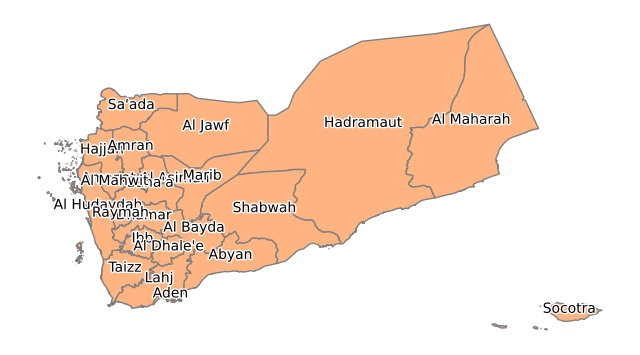

In [24]:
# Plot map.
draw_adminstratas(country = "Yemen", adminstratas_to_highlight = AdminStratas["Yemen"], figsize = (8, 5), annotation = True, 
                  path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_price.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The food prices dataframe has the values of all 13 administrative regions.

In [25]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Boucle-Du-Mouhoun', 'Sud-Ouest', 'Sahel', 'Cascades',
       'Centre-Ouest', 'Centre-Nord', 'Centre-Est', 'Centre', 'Est',
       'Plateau-Central', 'Nord', 'Hauts-Bassins', 'Centre-Sud'],
      dtype=object)

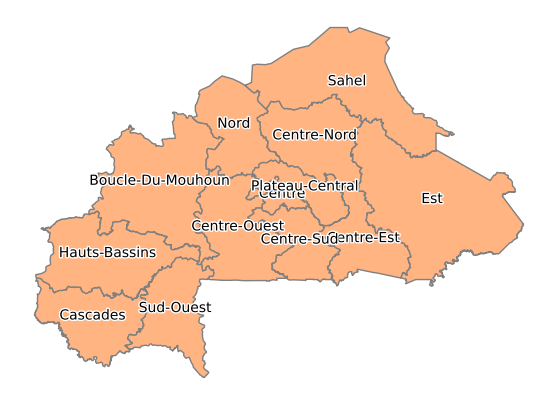

In [26]:
# Plot map.
draw_adminstratas(country = "Burkina Faso", adminstratas_to_highlight = AdminStratas["Burkina Faso"], figsize = (8, 5), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_price.png", dpi = 300)

- **Cameroon (CMR)**: the administrative regions of Cameroon are 10. The food prices dataframe has the values of 9 administrative regions.

In [27]:
print(AdminStratas["Cameroon"].shape)
AdminStratas["Cameroon"]

(9,)


array(['North-West', 'Central', 'West', 'Littoral', 'North', 'Far-North',
       'East', 'Adamawa', 'South-West'], dtype=object)

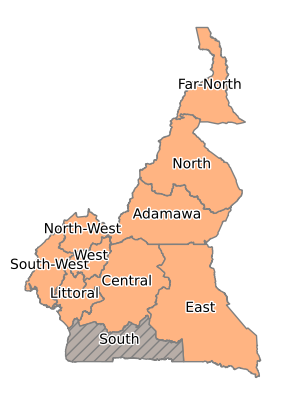

In [28]:
# Plot map.
draw_adminstratas(country = "Cameroon", adminstratas_to_highlight = AdminStratas["Cameroon"], figsize = (8, 5), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Cameroon/map_price.png", dpi = 300)

- **Mali (MLI)**: Mali is divided into eight regions and one capital district (Bamako). The AdminStrata items of the food prices dataframe cover all 9 regions.

In [29]:
print(AdminStratas["Mali"].shape)
AdminStratas["Mali"]

(9,)


array(['Bamako', 'Gao-Menaka', 'Koulikoro', 'Mopti', 'Segou', 'Sikasso',
       'Tombouctou-Taoudeni', 'Kayes', 'Kidal'], dtype=object)

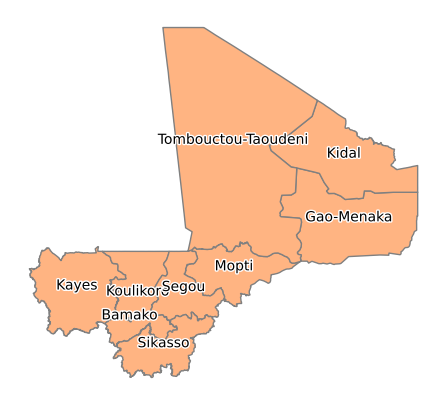

In [30]:
# Plot map.
draw_adminstratas(country = "Mali", adminstratas_to_highlight = AdminStratas["Mali"], figsize = (8, 5), annotation = True, 
                  path_to_save = PATH_TO_SAVE_DATA + "Mali/map_price.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 administrative regions. It also includes The Federal Capital Territory that is under the direct control of the federal government. The AdminStrata items of the food prices dataframe cover 14 administrative regions.

In [31]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(14,)


array(['Katsina', 'Sokoto', 'Borno', 'Kano', 'Jigawa', 'Oyo', 'Lagos',
       'Kaduna', 'Zamfara', 'Kebbi', 'Abia', 'Gombe', 'Yobe', 'Adamawa'],
      dtype=object)

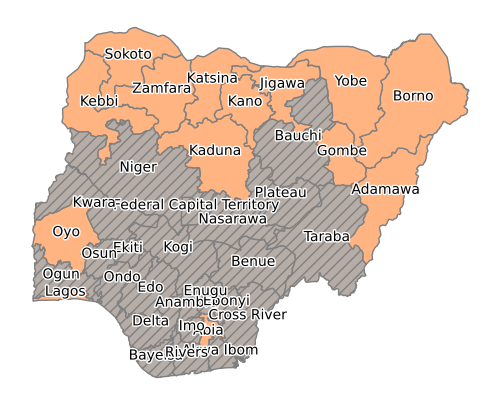

In [32]:
# Plot map.
draw_adminstratas(country = "Nigeria", adminstratas_to_highlight = AdminStratas["Nigeria"], figsize = (8, 5), annotation = True, 
                  annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_price.png", dpi = 300)

- **Syria (SYR)**: the administrative regions of the Syria country are 14. The market prices dataframe has the values of all 14 administrative regions.

In [33]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Aleppo', 'Tartous', 'Damascus', 'Rural Damascus', 'Homs',
       'Lattakia', "Dar'a", 'Al-Hasakeh', 'Deir-ez-Zor', 'Hama', 'Idleb',
       'Quneitra', 'As-Sweida', 'Ar-Raqqa'], dtype=object)

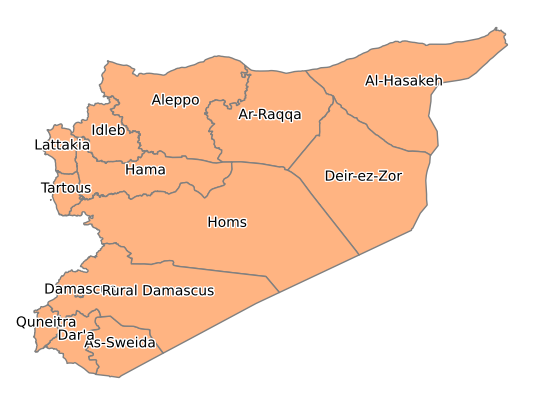

In [34]:
# Plot map.
draw_adminstratas(country = "Syria", adminstratas_to_highlight = AdminStratas["Syria"], figsize = (8, 5), annotation = True, 
                  path_to_save = PATH_TO_SAVE_DATA + "Syria/map_price.png", dpi = 300)

### Administrative regions and datetime reduction based on FCG <= 2 survey coverage

In [35]:
# Get the information regarding the administrative regions and datetime covered by the Food Consumption Score survey only.
for country in df["Country"].unique():    
    fcs_coverage = pd.read_csv(f"../1. Food Consumption Score (FCS)/output_timeseries/{country}/wfp_SvyDateRange-interpolate.csv", header = [0, 1], index_col = 0)    
    # Filtering on the administrative regions.
    adminstratas = fcs_coverage.columns.get_level_values("AdminStrata").unique()
    df = df[((df["Country"] == country) & (df["AdminStrata"].isin(adminstratas))) | (df["Country"] != country)]
    # Filtering on the datetime.
    time_index = pd.to_datetime(fcs_coverage.first_valid_index()) - pd.DateOffset(months = 4)
    df = df[((df["Country"] == country) & (df["Datetime"] > time_index)) | (df["Country"] != country)]

### Market prices preprocessing

In [36]:
np.sort(df["Commodity"].unique())

array(['Alcohol (spray)', 'Apples', 'Bananas', 'Beans (haricot)',
       'Beans (kidney red)', 'Beans (niebe)', 'Beans (red)',
       'Beans (white)', 'Bleach (chlorine)', 'Bread', 'Bread (bakery)',
       'Bread (bakery, parallel market)', 'Bread (shop)', 'Bulgur',
       'Cabbage', 'Carrots', 'Cassava', 'Cassava (cossette)',
       'Cassava (fresh)', 'Cassava leaves', 'Cassava meal (gari)',
       'Cassava meal (gari, yellow)', 'Cheese', 'Chicken', 'Chickpeas',
       'Cocoyam (macabo)', 'Couscous', 'Cowpeas', 'Cowpeas (Red)',
       'Cowpeas (brown)', 'Cowpeas (white)', 'Cucumbers', 'Dates',
       'Diapers', 'Dishwashing liquid', 'Eggplants', 'Eggs',
       'Exchange rate (unofficial)', 'Fish', 'Fish (dry)', 'Fish (fresh)',
       'Fish (frozen)', 'Fish (smoked)', 'Fish (tuna, canned)',
       'Fuel (diesel)', 'Fuel (diesel, heating, parallel market)',
       'Fuel (diesel, transport, parallel market)', 'Fuel (gas)',
       'Fuel (gas, parallel market)', 'Fuel (petrol-gasoline)',
 

N.B. Not all the administrative regions have a time series for all these commodities.

In [37]:
np.sort(df["Food Group"].unique())

array(['cereals and tubers', 'meat, fish and eggs', 'milk and dairy',
       'miscellaneous food', 'non-food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits'], dtype=object)

In [38]:
# Select sub-dataframe considering only the 'cereals and tubers'.
df = df.loc[df["Food Group"] == "cereals and tubers"]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,AdminStrata,Country
143944,2018-03-15,Millet,KG,cereals and tubers,0.9357,Amanat Al Asimah,Yemen
143945,2018-03-15,Potatoes,KG,cereals and tubers,1.5494,Amanat Al Asimah,Yemen
143947,2018-03-15,Rice (imported),KG,cereals and tubers,2.7990,Amanat Al Asimah,Yemen
143948,2018-03-15,Wheat,KG,cereals and tubers,0.7597,Amanat Al Asimah,Yemen
143949,2018-03-15,Wheat flour,KG,cereals and tubers,0.7997,Amanat Al Asimah,Yemen


In [39]:
df["Commodity"].unique()

array(['Millet', 'Potatoes', 'Rice (imported)', 'Wheat', 'Wheat flour',
       'Sorghum', 'Bread (bakery)', 'Bread (bakery, parallel market)',
       'Bulgur', 'Rice', 'Bread (shop)', 'Maize flour', 'Yam',
       'Rice (local)', 'Sorghum (white)', 'Sorghum (brown)',
       'Rice (milled, local)', 'Cassava meal (gari, yellow)',
       'Gari (white)', 'Maize (white)', 'Maize (yellow)', 'Bread',
       'Cassava (fresh)', 'Rice (long grain, imported)',
       'Cocoyam (macabo)', 'Sorghum (red)', 'Maize', 'Cassava (cossette)',
       'Cassava', 'Sorghum (local)', 'Pasta (spaghetti)', 'Taro',
       'Rice (paddy)', 'Pasta (macaroni)', 'Couscous', 'Semolina',
       'Noodles (instant, indomie)', 'Cassava meal (gari)',
       'Sweet potatoes', 'Potatoes (red)', 'Potatoes (Irish)'],
      dtype=object)

In [40]:
df["Unit"].unique()

array(['KG', '1.1 KG', 'MT', '1.3 KG', '1.4 KG', '3.4 KG', '100 KG',
       '50 KG', 'Unit', '3.1 KG', '160 KG', '18 KG', '5 KG', '20 KG',
       '90 KG', '15 KG', '120 KG', '500 G', '100 Tubers', 'Packet'],
      dtype=object)

In [41]:
# Adjust the mixed unit type.
df[["Unit value", "Unit type"]] = df["Unit"].str.split().apply(lambda x: [1] + x if len(x) < 2 else x).apply(pd.Series)
df["Unit value"] = df["Unit value"].astype(float)
df["Price"] = df["Price"] / df["Unit value"]
df.drop(["Unit value"], axis = 1, inplace = True)

In [42]:
# Check if some commodities are measured using multiple unit types among the provinces of the same countries.
def multiple_unit_check(x):
    if len(x["Unit type"].unique()) > 1:
        return list(x["Unit type"].unique())

commodities_units = df.groupby(["Country", "Commodity"]).apply(multiple_unit_check).dropna().to_dict()
commodities_units

{('Nigeria', 'Yam'): ['KG', 'Tubers'],
 ('Syria', 'Bulgur'): ['KG', 'MT'],
 ('Syria', 'Rice'): ['KG', 'MT']}

In [43]:
# Ignore the commodities with an unknown double unit.
df = df[~((df["Commodity"] == "Yam") & (df["Country"] == "Nigeria"))]

In [44]:
# Adjust unit.
df.loc[df["Unit type"] == "MT", "Price"] = df["Price"] / 1000
df.loc[df["Unit type"] == "MT", "Unit type"] = "KG"

In [45]:
# Check if some commodities are still measured using different unit type.
commodities_units = df.groupby(["Country", "Commodity"]).apply(multiple_unit_check).dropna().to_dict()
commodities_units

{}

In [46]:
# Add a suffix to each commodity corresponding to the unit value.
df[["Commodity", "Unit type"]] = df.apply(lambda x: pd.Series([x["Commodity"] + " (" + x["Unit type"] + ")", x["Unit type"]]), axis = 1)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,AdminStrata,Country,Unit type
143944,2018-03-15,Millet (KG),KG,cereals and tubers,0.9357,Amanat Al Asimah,Yemen,KG
143945,2018-03-15,Potatoes (KG),KG,cereals and tubers,1.5494,Amanat Al Asimah,Yemen,KG
143947,2018-03-15,Rice (imported) ...,KG,cereals and tubers,2.7990,Amanat Al Asimah,Yemen,KG
143948,2018-03-15,Wheat (KG),KG,cereals and tubers,0.7597,Amanat Al Asimah,Yemen,KG
143949,2018-03-15,Wheat flour (KG),KG,cereals and tubers,0.7997,Amanat Al Asimah,Yemen,KG


In [47]:
# Delete the unutilized columns in this notebook.
df.drop(labels = ["Unit type"], axis = 1, inplace = True)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,AdminStrata,Country
143944,2018-03-15,Millet (KG),KG,cereals and tubers,0.9357,Amanat Al Asimah,Yemen
143945,2018-03-15,Potatoes (KG),KG,cereals and tubers,1.5494,Amanat Al Asimah,Yemen
143947,2018-03-15,Rice (imported) ...,KG,cereals and tubers,2.7990,Amanat Al Asimah,Yemen
143948,2018-03-15,Wheat (KG),KG,cereals and tubers,0.7597,Amanat Al Asimah,Yemen
143949,2018-03-15,Wheat flour (KG),KG,cereals and tubers,0.7997,Amanat Al Asimah,Yemen


## Creation of the time series

In [48]:
# Create appropriate time series sub-groups with an appropriate datetime object sampling to the end of the months.
# If for the same date and commodity a province has more than one market price, the mean is taken.
df = df.groupby(["Country", "AdminStrata", "Food Group", "Commodity"]).apply(lambda x: x.set_index("Datetime").resample("M").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Food Group,Commodity,Datetime,Price
0,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) (KG),2019-05-31,0.209150
1,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) (KG),2019-06-30,0.198763
2,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) (KG),2019-07-31,0.192138
3,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) (KG),2019-08-31,0.188187
4,Burkina Faso,Boucle-Du-Mouhoun,cereals and tubers,Maize (white) (KG),2019-09-30,0.189838


In [49]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Food Group", "Commodity"]).unstack(["Country", "AdminStrata", "Food Group", "Commodity"])
df.columns = df.columns.droplevel(0)
df.sort_index(axis = 1, level = [0, 1, 2, 3], inplace = True)
df.rename({"cereals and tubers": "Price cereals and tubers"}, axis = 1, level = 2, inplace = True)
freq = "M"
df.index.freq = freq
df.head()

Country                 Burkina Faso                                   \
AdminStrata        Boucle-Du-Mouhoun                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Rice (imported) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (local) (KG) Sorghum (local) (KG) Sorghum (white) (KG)   
Datetime                                                                  
2018-03-31                NaN                  NaN                  NaN   
2018-04-30                NaN                  NaN                  NaN   
2018-05-31                NaN                  NaN                  NaN   
2018-06-30                NaN                  NaN                  NaN   
2018-07-31                NaN                  NaN                  NaN   

Country                                                             \
AdminStrata                 Cascades                                 
Food Group  Price cereals and tubers                                 
Commodity         Maize (white) (KG) Millet (KG) Rice (local) (KG)   
Datetime                                                             
2018-03-31                   NaN             NaN               NaN   
2018-04-30                   NaN             NaN               NaN   
2018-05-31                   NaN             NaN               NaN   
2018-06-30                   NaN             NaN               NaN   
2018-07-31                   NaN             NaN               NaN   

Country                           ...                    Yemen  \
AdminStrata                       ...                  Shabwah   
Food Group                        ... Price cereals and tubers   
Commodity   Sorghum (white) (KG)  ...               Wheat (KG)   
Datetime                          ...                            
2018-03-31                   NaN  ...               0.6398       
2018-04-30                   NaN  ...               0.6398       
2018-05-31                   NaN  ...               0.6398       
2018-06-30                   NaN  ...               0.6398       
2018-07-31                   NaN  ...               0.6558       

Country                                                                     \
AdminStrata                                   Socotra                        
Food Group                   Price cereals and tubers                        
Commodity   Wheat flour (KG)            Potatoes (KG) Rice (imported) (KG)   
Datetime                                                                     
2018-03-31            1.1196               0.9996                   2.5990   
2018-04-30            0.9996               1.0996                   2.5990   
2018-05-31            0.9996               2.1992                   2.7240   
2018-06-30            0.9996               2.3491                   2.8989   
2018-07-31            0.9996               1.9493                   2.9989   

Country                                                           \
AdminStrata                                                Taizz   
Food Group                              Price cereals and tubers   
Commodity   Wheat (KG) Wheat flour (KG)            Potatoes (KG)   
Datetime                                                           
2018-03-31      0.7197           0.

In [50]:
# Plot the time series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

In [51]:
# Now save the time series at country level keeping as indeces for each time series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [52]:
# Save the time series.
df.groupby(level = "Country", axis = 1).apply(lambda x: save(x, name = "wfp_market_price"));

## Adjustment of the time series: interpolation of NaN values

In [53]:
def interpolation(x): 
    # Let's interpolate the NaN values using a linear interpolation up to a limit of 3 months.
    x = x.loc[x.first_valid_index():x.last_valid_index()]
    x = x.interpolate(method = "linear", limit = 3)
    # Keep only the commodities that not have any nan values.
    return x.dropna(axis = 1, how = "any")

df_interpolate = df.groupby(axis = 1, level = "Country", group_keys = False).apply(interpolation)
df_interpolate.head()

Country                 Burkina Faso                                   \
AdminStrata        Boucle-Du-Mouhoun                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Rice (imported) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (local) (KG) Sorghum (local) (KG) Sorghum (white) (KG)   
Datetime                                                                  
2018-03-31                NaN                  NaN                  NaN   
2018-04-30                NaN                  NaN                  NaN   
2018-05-31                NaN                  NaN                  NaN   
2018-06-30                NaN                  NaN                  NaN   
2018-07-31                NaN                  NaN                  NaN   

Country                                                             \
AdminStrata                 Cascades                                 
Food Group  Price cereals and tubers                                 
Commodity         Maize (white) (KG) Millet (KG) Rice (local) (KG)   
Datetime                                                             
2018-03-31                   NaN             NaN               NaN   
2018-04-30                   NaN             NaN               NaN   
2018-05-31                   NaN             NaN               NaN   
2018-06-30                   NaN             NaN               NaN   
2018-07-31                   NaN             NaN               NaN   

Country                           ...                    Yemen  \
AdminStrata                       ...                  Shabwah   
Food Group                        ... Price cereals and tubers   
Commodity   Sorghum (white) (KG)  ...               Wheat (KG)   
Datetime                          ...                            
2018-03-31                   NaN  ...               0.6398       
2018-04-30                   NaN  ...               0.6398       
2018-05-31                   NaN  ...               0.6398       
2018-06-30                   NaN  ...               0.6398       
2018-07-31                   NaN  ...               0.6558       

Country                                                                     \
AdminStrata                                   Socotra                        
Food Group                   Price cereals and tubers                        
Commodity   Wheat flour (KG)            Potatoes (KG) Rice (imported) (KG)   
Datetime                                                                     
2018-03-31            1.1196               0.9996                   2.5990   
2018-04-30            0.9996               1.0996                   2.5990   
2018-05-31            0.9996               2.1992                   2.7240   
2018-06-30            0.9996               2.3491                   2.8989   
2018-07-31            0.9996               1.9493                   2.9989   

Country                                                           \
AdminStrata                                                Taizz   
Food Group                              Price cereals and tubers   
Commodity   Wheat (KG) Wheat flour (KG)            Potatoes (KG)   
Datetime                                                           
2018-03-31      0.7197           0.

In [54]:
# Plot time series.
TsIP(df_interpolate).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

## Common commodities

We select only the commodities that are in common between the adminstrative regions of the same country.

In [55]:
def common_commodities(x): 
    # Get frequency of the commodities among the regions.
    list_of_commodities = x.groupby(level = "AdminStrata", axis = 1).apply(lambda x: x.columns.get_level_values("Commodity"))
    # Get only commodities that are present for all the adminstratas.
    return x.iloc[:, x.columns.get_level_values("Commodity").isin(set.intersection(*map(set, list_of_commodities)))]

df_common = df_interpolate.groupby(axis = 1, level = "Country").apply(common_commodities)
df_common.dropna(axis = 1, how = "all", inplace = True)
df_common.head()

Country                 Burkina Faso                                   \
AdminStrata        Boucle-Du-Mouhoun                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                                                                \
AdminStrata                 Cascades                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                                                                \
AdminStrata                   Centre                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                               ...                    Yemen  \
AdminStrata               Centre-Est  ...                  Shabwah   
Food Group  Price cereals and tubers  ... Price cereals and tubers   
Commodity         Maize (white) (KG)  ...               Wheat (KG)   
Datetime                              ...                            
2018-03-31                   NaN      ...               0.6398       
2018-04-30                   NaN      ...               0.6398       
2018-05-31                   NaN      ...               0.6398       
2018-06-30                   NaN      ...               0.6398       
2018-07-31                   NaN      ...               0.6558       

Country                                                                     \
AdminStrata                                   Socotra                        
Food Group                   Price cereals and tubers                        
Commodity   Wheat flour (KG)            Potatoes (KG) Rice (imported) (KG)   
Datetime                                                                     
2018-03-31            1.1196               0.9996                   2.5990   
2018-04-30            0.9996               1.0996                   2.5990   
2018-05-31            0.9996               2.1992                   2.7240   
2018-06-30            0.9996               2.3491                   2.8989   
2018-07-31            0.9996               1.9493                   2.9989   

Country                                                           \
AdminStrata                                                Taizz   
Food Group                              Price cereals and tubers   
Commodity   Wheat (KG) Wheat flour (KG)            Potatoes (KG)   
Datetime                                             

In [56]:
# Plot time series.
TsIP(df_common).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

### Normalization

Let's perform a simple normalization of the food prices over the commodities of all the provinces of the same country in order to subsequently take the mean of the commodities into the same food group.

In [57]:
def normalization(group):
    group_scaled = group.stack([1, 2])
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(group_scaled)
    group_scaled[:] = scaled_data
    group_scaled = group_scaled.unstack([1, 2]).reorder_levels([0, 2, 3, 1], axis = 1).sort_index(axis = 1, level = [0, 1, 2, 3])
    group_scaled = group_scaled.dropna(axis = 1, how = "all")
    return group_scaled

df_norm = df_common.groupby(axis = 1, level = "Country", group_keys = False).apply(normalization)
df_norm.head()

Country                 Burkina Faso                                   \
AdminStrata        Boucle-Du-Mouhoun                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                                                                \
AdminStrata                 Cascades                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                                                                \
AdminStrata                   Centre                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-30                   NaN             NaN                  NaN   
2018-05-31                   NaN             NaN                  NaN   
2018-06-30                   NaN             NaN                  NaN   
2018-07-31                   NaN             NaN                  NaN   

Country                               ...                    Yemen  \
AdminStrata               Centre-Est  ...                  Shabwah   
Food Group  Price cereals and tubers  ... Price cereals and tubers   
Commodity         Maize (white) (KG)  ...               Wheat (KG)   
Datetime                              ...                            
2018-03-31                   NaN      ...             0.011329       
2018-04-30                   NaN      ...             0.011329       
2018-05-31                   NaN      ...             0.011329       
2018-06-30                   NaN      ...             0.011329       
2018-07-31                   NaN      ...             0.015861       

Country                                                                     \
AdminStrata                                   Socotra                        
Food Group                   Price cereals and tubers                        
Commodity   Wheat flour (KG)            Potatoes (KG) Rice (imported) (KG)   
Datetime                                                                     
2018-03-31          0.121965             0.050636                 0.096763   
2018-04-30          0.085367             0.066464                 0.096763   
2018-05-31          0.085367             0.240515                 0.116932   
2018-06-30          0.085367             0.264242                 0.145153   
2018-07-31          0.085367             0.200959                 0.161288   

Country                                                           \
AdminStrata                                                Taizz   
Food Group                              Price cereals and tubers   
Commodity   Wheat (KG) Wheat flour (KG)            Potatoes (KG)   
Datetime                                             

In [58]:
# Plot time series.
TsIP(df_norm).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

In [59]:
# Resample data to daily level.
df_norm_fit = df_norm.groupby(axis = 1, level = [0, 1, 2, 3], group_keys = False).apply(lambda x: x.loc[x.first_valid_index():x.last_valid_index()].resample("D").first())
freq = "D"
df_norm_fit.index.freq = freq
df_norm_fit.head()

Country                 Burkina Faso                                   \
AdminStrata        Boucle-Du-Mouhoun                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-01                   NaN             NaN                  NaN   
2018-04-02                   NaN             NaN                  NaN   
2018-04-03                   NaN             NaN                  NaN   
2018-04-04                   NaN             NaN                  NaN   

Country                                                                \
AdminStrata                 Cascades                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-01                   NaN             NaN                  NaN   
2018-04-02                   NaN             NaN                  NaN   
2018-04-03                   NaN             NaN                  NaN   
2018-04-04                   NaN             NaN                  NaN   

Country                                                                \
AdminStrata                   Centre                                    
Food Group  Price cereals and tubers                                    
Commodity         Maize (white) (KG) Millet (KG) Sorghum (white) (KG)   
Datetime                                                                
2018-03-31                   NaN             NaN                  NaN   
2018-04-01                   NaN             NaN                  NaN   
2018-04-02                   NaN             NaN                  NaN   
2018-04-03                   NaN             NaN                  NaN   
2018-04-04                   NaN             NaN                  NaN   

Country                               ...                    Yemen  \
AdminStrata               Centre-Est  ...                  Shabwah   
Food Group  Price cereals and tubers  ... Price cereals and tubers   
Commodity         Maize (white) (KG)  ...               Wheat (KG)   
Datetime                              ...                            
2018-03-31                   NaN      ...             0.011329       
2018-04-01                   NaN      ...                  NaN       
2018-04-02                   NaN      ...                  NaN       
2018-04-03                   NaN      ...                  NaN       
2018-04-04                   NaN      ...                  NaN       

Country                                                                     \
AdminStrata                                   Socotra                        
Food Group                   Price cereals and tubers                        
Commodity   Wheat flour (KG)            Potatoes (KG) Rice (imported) (KG)   
Datetime                                                                     
2018-03-31          0.121965             0.050636                 0.096763   
2018-04-01               NaN                  NaN                      NaN   
2018-04-02               NaN                  NaN                      NaN   
2018-04-03               NaN                  NaN                      NaN   
2018-04-04               NaN                  NaN                      NaN   

Country                                                           \
AdminStrata                                                Taizz   
Food Group                              Price cereals and tubers   
Commodity   Wheat (KG) Wheat flour (KG)            Potatoes (KG)   
Datetime                                             

In [60]:
# Plot time series.
TsIP(df_norm_fit.dropna(how = "all")).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time series', 'Missing values'), value='Time series')

Output()

## Unique food groups time series considering the mean

We only consider the food groups taking the mean of the commodities.

In [61]:
# Consider only the mean of the food group.
df_fit_group = df_norm_fit.groupby(level = [0, 1, 2], axis = 1).mean()
df_fit_group.head()

Country                 Burkina Faso                           \
AdminStrata        Boucle-Du-Mouhoun                 Cascades   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-03-31                   NaN                      NaN       
2018-04-01                   NaN                      NaN       
2018-04-02                   NaN                      NaN       
2018-04-03                   NaN                      NaN       
2018-04-04                   NaN                      NaN       

Country                                                        \
AdminStrata                   Centre               Centre-Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-03-31                   NaN                      NaN       
2018-04-01                   NaN                      NaN       
2018-04-02                   NaN                      NaN       
2018-04-03                   NaN                      NaN       
2018-04-04                   NaN                      NaN       

Country                                                        \
AdminStrata              Centre-Nord             Centre-Ouest   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-03-31                   NaN                      NaN       
2018-04-01                   NaN                      NaN       
2018-04-02                   NaN                      NaN       
2018-04-03                   NaN                      NaN       
2018-04-04                   NaN                      NaN       

Country                                                        \
AdminStrata               Centre-Sud                      Est   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-03-31                   NaN                      NaN       
2018-04-01                   NaN                      NaN       
2018-04-02                   NaN                      NaN       
2018-04-03                   NaN                      NaN       
2018-04-04                   NaN                      NaN       

Country                                                        ...  \
AdminStrata            Hauts-Bassins                     Nord  ...   
Food Group  Price cereals and tubers Price cereals and tubers  ...   
Datetime                                                       ...   
2018-03-31                   NaN                      NaN      ...   
2018-04-01                   NaN                      NaN      ...   
2018-04-02                   NaN                      NaN      ...   
2018-04-03                   NaN                      NaN      ...   
2018-04-04                   NaN                      NaN      ...   

Country                        Yemen                           \
AdminStrata                   Hajjah                      Ibb   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-03-31              0.057009                 0.059277       
2018-04-01                   NaN                      NaN       
2018-04-02                   NaN                      NaN       
2018-04-03                   NaN                      NaN       
2018-04-04                   NaN                      NaN       

Country                                                        \
AdminStrata                     Lahj                    Marib   
Food Group  Price cereals and tubers Price cereals and tubers   
Datetime                                                        
2018-03-31              0.044928                 0.033702       
2018-04-01                   NaN                      NaN       
2018-04-02                   NaN                 

In [62]:
# Plot time series.
TsIP(df_fit_group.dropna(how = "all")).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Mali', 'Nigeria', 'Syria'…

In [63]:
# Save the time series.
df_fit_group.groupby(level = "Country", axis = 1).apply(lambda x: save(x, name = "wfp_market_price-interpolate"));

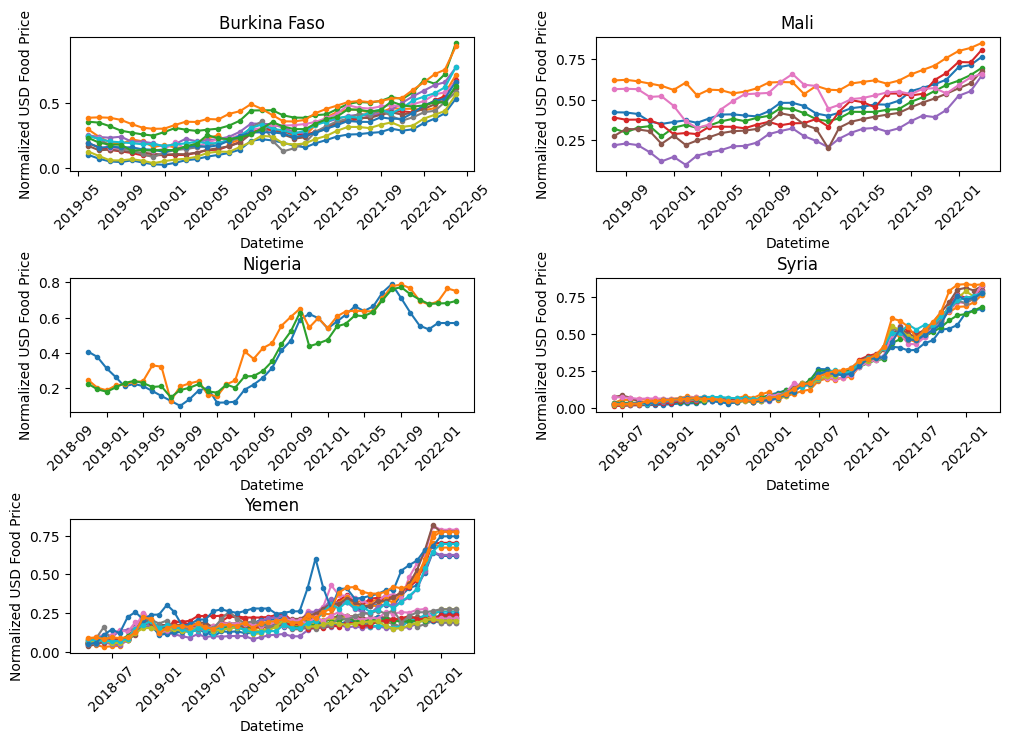

In [64]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 8))
fig.subplots_adjust(hspace = .8, wspace = .3)
axs = axs.ravel()
for i, country in enumerate(df_fit_group.columns.get_level_values("Country").unique()):
    axs[i].plot(df_fit_group[country].xs("Price cereals and tubers", axis = 1, level = "Food Group", drop_level = False).dropna(), 
                ls = "-", marker = "o", markersize = 3)
    axs[i].set_title(country)
    axs[i].set_xlabel("Datetime")
    axs[i].set_ylabel("Normalized USD Food Price")
    axs[i].tick_params(axis = "x", labelrotation = 45)
# Remove extra plot.
axs[-1].set_axis_off()
# Save the figure.
fig.savefig(PATH_TO_SAVE_DATA + "time_series.png", dpi = 300, bbox_inches = "tight")